# **Obtención y preparación de datos**
# OD05. Conceptos de Algebra Lineal

## <font color='blue'>**Qué es el algebra lineal?**</font>

El **álgebra lineal** es una rama de las matemáticas que estudia conceptos tales como vectores, matrices, espacio dual, sistemas de ecuaciones lineales y, en su enfoque de manera más formal, espacios vectoriales y sus transformaciones lineales.

Es un área activa que tiene conexiones con muchas áreas dentro y fuera de las matemáticas, como el análisis funcional, las ecuaciones diferenciales, la investigación de operaciones, las gráficas por computadora, la ingeniería, etc.

**Es el lenguaje de muchas teorías matemáticas y físicas, machine learning y computación eficiente.**



In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
sns.set()
rcParams['figure.dpi'] = 144

## <font color='blue'>**Escalares, vectores, matrices y tensores**</font>

Un **escalar** es únicamente un número, a diferencia de la mayoría de los otros elementos del álgebra lineal que son conjuntos de valores como los vectores y matrices.

$$\omega = 12.5$$
$$a = 3$$

Un **vector** es un arreglo de números. Un vector de $n$ componentes se define como un conjunto ordenado de $n$ números. Muchas nociones físicas, tales como las fuerzas, velocidades y aceleraciones, involucran una magnitud (el valor de la fuerza, velocidad o aceleración) y una dirección. Cualquier entidad que involucre magnitud y dirección se llama vector. Los vectores se representan por flechas en las que la longitud de ellas define la magnitud; y la dirección de la flecha representa la dirección del vector. Podemos pensar en los vectores como una serie de números. Éstos números tienen una orden preestablecido, y podemos identificar cada número individual por su índice en ese orden. Los vectores identifican puntos en el espacio, en donde cada elemento representa una coordenada del eje en el espacio. Podemos representarlos es las siguientes formas:

como vectores columna:

$$\vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix} \qquad \vec{a} = \begin{pmatrix}a_0\\a_1\\a_2\\a_3\end{pmatrix}$$

o como vectores fila:

$$\vec{x} = \begin{pmatrix}t, y, z, w\end{pmatrix} \qquad \vec{a} = \begin{pmatrix}a_0, a_1, a_2, a_3\end{pmatrix}$$

Una **matriz** es un arreglo bidimensional de números. Cada elemento de la misma está identificado por dos índices, en lugar de uno como en los vectores.

$$\mathbf{A} = \begin{pmatrix}a_{0,0} & b_{0,1} & c_{0,2}\\a_{1,0} & b_{1,1} & c_{1,2}\end{pmatrix}\qquad
 \mathbf{B} = \begin{pmatrix}a_{0,0} & b_{0,1}\\a_{1,0} & b_{1,1}\\a_{2,0} & b_{2,1}\end{pmatrix}$$

Existen diversos casos en los cuales se precisan mas de dos ejes para almacenar valores. En el caso general, una matriz con un número regular de ejes se lo conoce como __tensor__ (matriz N-dimensional, con $N > 2$). Por ejemplo, cuando almacenamos los valores de los píxeles de una imagen a color necesitamos una matriz con tres ejes (uno para cada canal de color: R, G y B).

A continuación crearemos dos fuciones.
* `planoCartesiano()`, la cual crea un plano cartesiano de dimensiones $n \times n$
* `graficarVectores()` la cual dibuja una lista de  vectores en dicho plano.

Al final del notebook, dejamos una versión más sofisticadas de la función para dibujar un plano cartesiano: `e_cartesiano()`. Revísela y deconstrúyala hasta entenderla.

In [ ]:
def planoCartesiano(n):
    min, max = -1 * n, n
    fig, ax = plt.subplots(figsize=(4, 4))
    plt.axvline(x=0, color='grey', zorder=0)
    plt.axhline(y=0, color='grey', zorder=0)
    ax.set_xlim(min, max)
    ax.set_ylim(min, max)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    return ax

def graficarVector(vec, origen=[0,0], color='k' , alpha=1):
    x = np.concatenate((origen, vec), axis=None)
    plt.quiver([x[0]],
               [x[1]],
               [x[2] - x[0]],
               [x[3] - x[1]],
               angles='xy', scale_units='xy', scale=1,
               color=color,
               alpha=alpha)


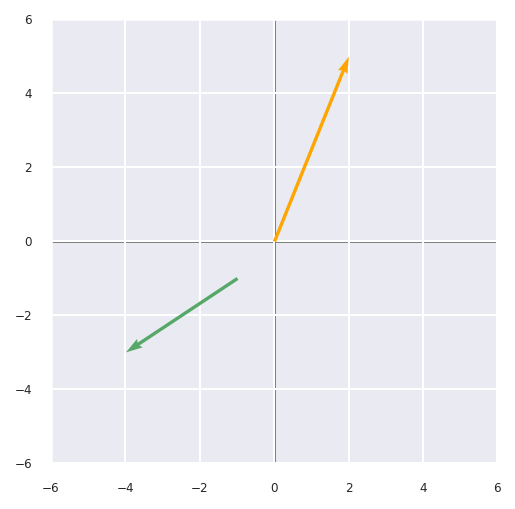

In [ ]:
planoCartesiano(6)
graficarVector([2,5], color='orange')
graficarVector([-4,-3], [-1,-1], color='g')

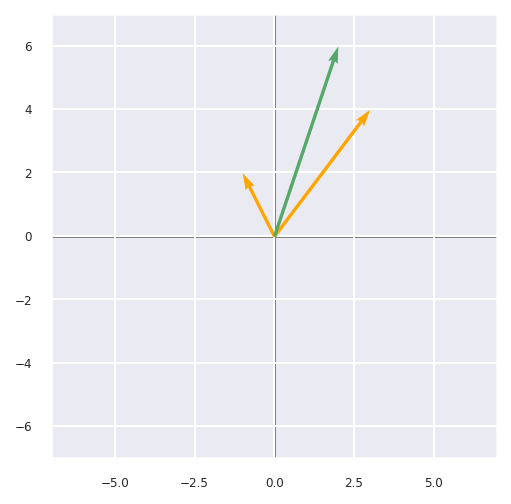

In [ ]:
a = np.array([[-1, 2]]) #tiene 2 dimensiones porque hay 2 corchetes
b = np.array([[3, 4]])
planoCartesiano(7)
graficarVector(a, color='orange')
graficarVector(b, color='orange')
graficarVector(a+b, color='g')
#graficarVector(b, a, color='g')

## <font color='blue'>**Operaciones con vectores y matrices**</font>

### <font color='blue'>**Multiplicación de matrices**</font>

Sean las siguientes matrices:

$$\mathbf{A} = \begin{pmatrix}a_{00} & a_{01} & a_{02} & a_{03}\\a_{10} & a_{11} & a_{12} & a_{13}\\
a_{20} & a_{21} & a_{22} & a_{23}\\ a_{30} & a_{31} & a_{32} & a_{33}\end{pmatrix} \qquad \vec{x} =
\begin{pmatrix}x_0 \\ x_1 \\ x_2 \\ x_3\end{pmatrix}$$
<br>
La multiplicación de matrices se puede definir como:
<br>
$$\vec{p} = \mathbf{A} \vec{x}$$

donde

$$p_{i} = \sum_j a_{i j} x_j$$

Lo anterior nos permite pasar desde la representación matricial al sistema de ecuaciones, por ejemplo:
<br><br>
$$p_{0} = a_{00} x_0 + a_{01} x_1 + a_{02} x_2 + a_{03} x_3 $$
<br><br>
Multiplicando todo, obtenemos:
<br><br>
$$\quad \begin{pmatrix}a_{00} x_0 + a_{01} x_1 + a_{02} x_2 + a_{03} x_3 \\
a_{10} x_0 + a_{11} x_1 + a_{12} x_2 + a_{13} x_3\\a_{20} x_0 + a_{21} x_1 + a_{22} x_2 + a_{23} x_3\\a_{30} x_0 + a_{31} x_1 + a_{32} x_2 + a_{33} x_3 \end{pmatrix} =
\begin{pmatrix}p_0\\p_1\\p_2\\p_3\end{pmatrix}$$
<br><br>
que corresponde a la representación como sistema de ecuaciones lineales.

La definición general para la multiplicación de matrices es:

$$\mathbf{C} = \mathbf{A}\mathbf{B}$$

entonces,

$$c_{i j} = \sum_k a_{i k} b_{k j}$$

<img src='https://drive.google.com/uc?export=view&id=1s5v3KJVjvq4BfNsiwou6mq6Za1jyr6Rf' width="800" align="center" style="margin-right: 20px">

Esta definición genera restricciones sobre lo que podemos multiplicar: solo funcionan aquellos casos en los que el **número de columnas en la primera matriz es igual al número de filas en la segunda matriz**.

La multiplicación de matrices no es conmutativa, es decir, $\mathbf{A} \mathbf{B} \neq \mathbf{B} \mathbf{A}$.

En Numpy, la multiplicacion de matrices se realiza con la función `dot`.

In [ ]:
#en multiplicacion de matrices el numero de columnas de A tiene que ser igual que el numero de filas de B
#no hay conmutatividad, AxB no es igual a BxA

A = np.array ([[1,2], [3,4], [5,6]])
B = np.array ([[1,2,3], [3,4,5]])

# A x B
np.dot(A, B) ## multiplicacion matricial , el @ tambien sirve, hay una tercera forma que es matmul

array([[ 7, 10, 13],
       [15, 22, 29],
       [23, 34, 45]])

In [ ]:
# Alternativa
np.matmul(A, B)

array([[ 7, 10, 13],
       [15, 22, 29],
       [23, 34, 45]])

In [ ]:
# Alternativa
A @ B

array([[ 7, 10, 13],
       [15, 22, 29],
       [23, 34, 45]])

### <font color='blue'>**Adición de matrices**</font>
La adición de matrices es simplemente agregar los elementos correspondientes. Aunque se debe tener en cuenta que esto solo tiene sentido para matrices que tienen la misma forma. Por lo tanto, puede sumar dos matrices de tamaño (3 x 2), pero no una (3 x 2) con una (2 x 3).

La adición de matrices es conmutativa, por lo tanto, $\mathbf{A} + \mathbf{B} = \mathbf{B} + \mathbf{A}$

En Numpy, la suma de matrices se realiza con el operador `+`.



In [ ]:
A = np.array ([[1, 2, 3], [4, 5 ,6], [7, 8, 9]])
B = np.array ([[9, 8, 7], [6, 5, 4], [3, 2, 1]])

# A + B
A + B

array([[10, 10, 10],
       [10, 10, 10],
       [10, 10, 10]])

Se tiene la siguiente suma de ecuaciones:
<br><br>
$$(a x + b y) + (c x + d y) = (a + c) x + (b + d) y$$
<br><br>
Lo anterior, lo podemos representar como un sistema de ecuaciones:
<br><br>
$$\begin{pmatrix}a_0 x + b_0 y\\a_1 x + b_1 y\\a_2 x + b_2 y\end{pmatrix} +
\begin{pmatrix}c_0 x + d_0 y\\c_1 x + d_1 y\\c_2 x + d_2 y\end{pmatrix} =
\begin{pmatrix}(a_0 + c_0) x + (b_0 + d_0) y\\(a_1 + c_1) x + (b_1 + d_1) y\\(a_2 + c_2) x +
(b_2 + c_2) y\end{pmatrix}$$
<br><br>
En notación matricial, quedaría como una combinación de multiplicaciones y sumas de matrices:
<br><br>
$$\begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} +
\begin{pmatrix}c_0 & d_0\\c_1 & d_1\\c_2 & d_2\end{pmatrix} \begin{pmatrix}x\\y\end{pmatrix} =
\begin{pmatrix}(a_0 + c_0) & (b_0 + d_0)\\(a_1 + c_1) & (b_1 + d_1)\\(a_2 + c_2) & (b_2 + c_2)\end{pmatrix}
\begin{pmatrix}x\\y\end{pmatrix}$$

## <font color='blue'>**Ecuaciones lineales**</font>

Una ecuación lineal o de primer orden es una igualdad que involucra una o más variables a la primera potencia y no contiene productos entre las variables, es decir, una ecuación que involucra solamente sumas y restas de una variable a la primera potencia. Por ejemplo:

 1. $y = 1.75$
 1. $\pi w - e y = 3 x$
 1. $5(x + y + z) = 7y$

## <font color='blue'>**Sistemas de ecuaciones lineales**</font>

Un sistema de ecuaciones lineales es un conjunto de ecuaciones lineales de la forma:
<br><br>
$$a_{11} x_1 + a_{12} x_2 + a_{13} x_3 + ··· + a_{1n} x_n = b_1$$
$$a_{21} x_1 + a_{22} x_2 + a_{23} x_3 + ··· + a_{2n} x_n = b_2$$
$$.$$
$$.$$
$$.$$
$$a_{m1} x_1 + a_{m2} x_2 + a_{m3} x_3 + ··· + a_{mn} x_n = b_m$$
<br><br>
En este caso tenemos $m$ ecuaciones y $n$ incógnitas. Los números reales $a_{ij}$ se denominan coeficientes y los $x_i$ se denominan incógnitas (o números a determinar) y $b_j$ se denominan términos independientes.

Resolver el sistema consiste en calcular las incógnitas para que se cumplan todas las ecuaciones del sistema simultáneamente.

Veamos un ejemplo de 2 incoógnitas y dos ecuaciones:

$$5 x + 2.45 y = 3.6$$
$$6 x - 1.2 y = 0$$

O uno genérico de 4 variables y 4 ecuaciones:

$$a_0 t + b_0 y + c_0 z + d_0 w = e_0$$
$$a_1 t + b_1 y + c_1 z + d_1 w = e_1$$
$$a_2 t + b_2 y + c_2 z + d_2 w = e_2$$
$$a_3 t + b_3 y + c_3 z + d_3 w = e_3$$

En notación matricial:
<br><br>
$$\begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}
\begin{pmatrix}t\\y\\z\\w\end{pmatrix} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$
<br><br>
Esto dice exactamente lo mismo, solo que en una forma diferente. Pero usa vectores y matrices, nuestros dos nuevos objetos y las ideas de multiplicación y suma de matrices. En este caso tenemos 2 vectores y 1 matriz, que puede ser escrito como:
<br><br>
$$\mathbf{A} = \begin{pmatrix}a_0 & b_0 & c_0 & d_0\\a_1 & b_1 & c_1 & d_1\\
a_2 & b_2 & c_2 & d_2\\ a_3 & b_3 & c_3 & d_3\end{pmatrix}\qquad \vec{x} = \begin{pmatrix}t\\y\\z\\w\end{pmatrix}
\qquad \vec{e} = \begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix}$$

O de forma compacta

$$\mathbf{A}\mathbf{x} = \mathbf{e}$$

Despejando $x$, obtenemos

$$\mathbf{x} = \mathbf{A^{-1}}\mathbf{e}$$

Veamos esto con el ejemplo del sistema de ecuaciones de $2\times2$ anterior:


In [ ]:
##para que una matriz sea invertible tiene que ser de nxn, si el determinante es 0 no es invertible

# Creamos la matrix 'A' con los coeficientes
A = np.array([[5, 2.45], [6, -1.2]])
# Creamos el vector 'e' con los términos independientes
e = np.array([[3.6], [0]])
print('Coeficientes\n', A, '\n')
print('Términos independientes \n', e, '\n')
# Aplicamos la fórmula; con np.linealg.inv() invertimos la matriz pasada como argumento
x = np.dot(np.linalg.inv(A), e)
print(f'El valor de la incógnita x es: {x[0][0]: 3.1f}')
print(f'El valor de la incógnita y es: {x[1][0]: 3.1f}')

Coeficientes
 [[ 5.    2.45]
 [ 6.   -1.2 ]] 

Términos independientes 
 [[3.6]
 [0. ]] 

El valor de la incógnita x es:  0.2
El valor de la incógnita y es:  1.0


# <font color='purple'>**Material Adicional**</font><br>

Para tratar con un sistemas de ecuaciones rectangulares con matrices no invertibles, se puede utilizar el método de Eliminación Gaussiana. Aunque no se llegue a una única solución, este método sirve para simplificar el sistema y obtener información sobre las soluciones. ([link](https://adamdhalla.medium.com/linear-algebra-5-solving-ax-b-in-non-invertible-non-square-matrices-5a2ded30051e))

En el caso de una matriz singular o un sistema subdeterminado (menos ecuaciones que incógnitas), la eliminación gaussiana permite reducir la matriz hasta un punto donde se identifiquen variables libres. A partir de aquí, puedes expresar la solución en términos de estas variables libres, resultando en una solución paramétrica o en un conjunto de soluciones infinitas. Este método también puede indicar si el sistema es inconsistente, es decir, si no tiene ninguna solución.

Además, para matrices rectangulares se puede usar el método Moore-Penrose. Este obtiene una solución de mínimos cuadrados que minimiza el error entre
Ax y b cuando no existe una solución exacta. Para determinar esta solución aproximada se calcula la pseudoinversa de la matriz no invertible. ([link](https://en.wikipedia.org/wiki/Moore–Penrose_inverse)). En NumPy, esto se hace con la función `np.linalg.pinv()` ([link](https://stackoverflow.com/questions/49357417/why-is-numpy-linalg-pinv-preferred-over-numpy-linalg-inv-for-creating-invers)).

### <font color='purple'>**Fin Material Adicional**</font><br>

## <font color='blue'>**Producto escalar**</font>

Un caso especial de multiplicación de matrices es multiplicar dos vectores. Por supuesto, no podemos multiplicar directamente dos vectores de 4 x 1; su forma es incompatible.

Para poder realizar esta multiplicación es necesario transponer el vector, lo que corresponde a intercambiar filas por columnas. Se denota con una 𝑇 mayúscula como exponente.

Trabajando con las matrices anteriores:

$$\mathbf{B} = \begin{pmatrix}a_0 & b_0 & c_0\\a_1 & b_1 & c_1\end{pmatrix}\qquad
 \mathbf{C} = \begin{pmatrix}a_0 & b_0\\a_1 & b_1\\a_2 & b_2\end{pmatrix}$$

$$\mathbf{B}^T = \begin{pmatrix}a_0 & a_1\\b_0 & b_1\\c_0 & c_1\end{pmatrix}\qquad
 \mathbf{C}^T = \begin{pmatrix}a_0 & a_1 & a_2\\b_0 & b_1 & b_2\end{pmatrix}$$
<br><br>
Lo anterior, es equivalente a cambiar el orden de los índices de los elementos:

$$a_{ij} \rightarrow a_{ji}$$



In [ ]:
# Matriz A
print('Matriz A')
print(A, '\n')
print('Matriz A traspuesta')
# Matriz A traspuesta
print(A.T)

Matriz A
[[ 5.    2.45]
 [ 6.   -1.2 ]] 

Matriz A traspuesta
[[ 5.    6.  ]
 [ 2.45 -1.2 ]]


Tenga en cuenta que esto cambia la forma de la matriz. En particular, convertirá los vectores de columna en vectores de fila y viceversa.

In [ ]:
c = np.array([1, 2, 3, 4])
print(f'c es un vector de forma {c.shape}, luego tiene una sola dimensión (1-D)')
print(c, '\n')
# No odemos trasponer un objeto de 1-D
# Debemos darle una segunda dimensión aun cuando esta sea cero
c = np.array([[1, 2, 3, 4]]) # Atención a los dos pares de brackets
print(f'c es un vector de forma {c.shape}, ahora tiene dos dimensiones (2-D)')
print(c, '\n')
print(f'c traspuesto es un vector de forma {c.T.shape}')
print(c.T)


c es un vector de forma (4,), luego tiene una sola dimensión (1-D)
[1 2 3 4] 

c es un vector de forma (1, 4), ahora tiene dos dimensiones (2-D)
[[1 2 3 4]] 

c traspuesto es un vector de forma (4, 1)
[[1]
 [2]
 [3]
 [4]]


In [ ]:
# La traspuesta de un vector no funciona
d = np.array([1, 2, 3, 4])
print(d.shape)
print(d.T.shape)

(4,)
(4,)


Es posible definir el **producto escalar** de dos vectores como:
<br><br>
$$\mathrm{dot}(\vec{a},\vec{b}) = \vec{a}\cdot\vec{b} = \vec{a}^T \;\vec{b}$$
<br><br>
El objeto resultante de esta operación es de $1x1$, es decir, un escalar. Por ejemplo:

$$\vec{x}\cdot\vec{e} = \begin{pmatrix}t & y & z & w\end{pmatrix}
\begin{pmatrix}e_0\\e_1\\e_2\\e_3\end{pmatrix} = e_0 t + e_1 y + e_2 z + e_3 w$$

Un caso aún más especial es el producto escalar de un vector consigo mismo. Esto da una medida escalar del vector y da lugar a la norma o magnitud (el largo) del vector.

$$\lVert \vec{v} \lVert^2 = \vec{v}\cdot\vec{v}$$

o

$$\lVert \vec{v} \lVert = \sqrt{\vec{v}\cdot\vec{v}}$$

Si estos vectores están en $\mathbb{R}^n$, entonces corresponde a la distancia euclidiana tradicional dada por el teorema de Pitágoras.



In [ ]:
print(f'Vector c de forma {c.shape}')
print(c, '\n')
d = np.array([[1], [2], [3], [4]])
print(f'Vector d de forma {d.shape}')
print(d, '\n')
print(f'Producto escalar de c y d = {np.dot(c, d)[0][0]}')

Vector c de forma (1, 4)
[[1 2 3 4]] 

Vector d de forma (4, 1)
[[1]
 [2]
 [3]
 [4]] 

Producto escalar de c y d = 30


In [ ]:
import math

e = np.array([[3], [4]])
print(f'Vector e de forma {e.shape}')
print(e, '\n')
print(f'Vector e traspuesto {e.T.shape}')
print(e.T, '\n')
print(f'Producto escalar de e traspuesto y e = {np.dot(e.T, e)}')

print(f'Y la norma de e = {math.sqrt(np.dot(e.T, e))}')

Vector e de forma (2, 1)
[[3]
 [4]] 

Vector e traspuesto (1, 2)
[[3 4]] 

Producto escalar de e traspuesto y e = [[25]]
Y la norma de e = 5.0


<ipython-input-14-4036fb1e8c6c>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'Y la norma de e = {math.sqrt(np.dot(e.T, e))}')


Producto escalar de e y f = [[2]]

Y la distancia Euclidiana entre ambos es = 5.4



<ipython-input-15-233f1cd0d430>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dist = math.sqrt(np.dot(t.T, t))


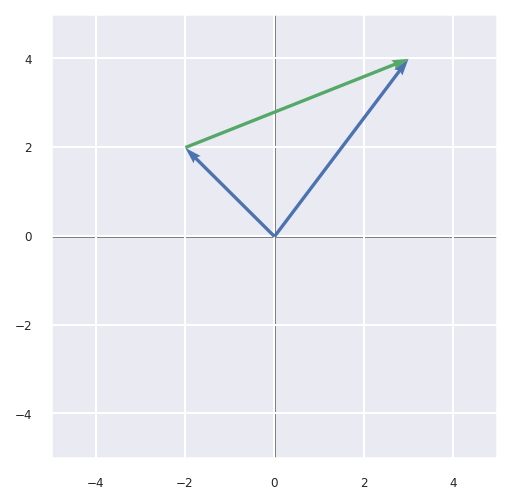

In [ ]:
f = np.array([[-2], [2]])
print(f'Producto escalar de e y f = {np.dot(e.T, f)}\n')
t = e - f
dist = math.sqrt(np.dot(t.T, t))
print(f'Y la distancia Euclidiana entre ambos es = {dist:3.1f}\n')
planoCartesiano(5)
graficarVector(e, color='b')
graficarVector(f, color='b')
graficarVector(e, f, color='g')

In [ ]:
# Dos formas de calcularlo

print(f'{np.linalg.norm(e - f): 3.1f}')
print(f'{math.sqrt(np.dot(t.T, t)): 3.1f}')

 5.4
 5.4


<ipython-input-16-e02a36e3ff3a>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f'{math.sqrt(np.dot(t.T, t)): 3.1f}')


## <font color='blue'>**Ortogonalidad**</font>

Dos vectoree son __ortogonales__ si son perpendiculares, es decir, dos líneas trazadas en las direcciones respectivas se cruzan en ángulo recto. En 2-D, podríamos elegir los ejes 𝑥 e 𝑦 (vectores rojos), o los dos vectores a 45 grados entre ellos (azules). Ejecute la siguiente celda para ver lo anteriormente expuesto.

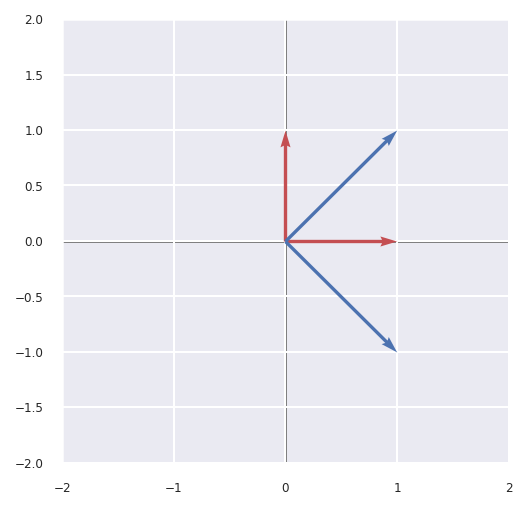

In [ ]:
planoCartesiano(2)
graficarVector([0,1], color='r')
graficarVector([1,0], color='r')
graficarVector([1,1], color='b')
graficarVector([1,-1], color='b')

Por ejemplo consideremos los siguientes vectores:
<br><br>
$$\begin{pmatrix}1\\0\end{pmatrix}\cdot\begin{pmatrix}0\\1\end{pmatrix} = 0\qquad
\begin{pmatrix}1\\1\end{pmatrix}\cdot\begin{pmatrix}1\\-1\end{pmatrix} = 0$$
<br><br>
**Dos vectores son ortogonales si y solo si su producto escalar es cero**.
<br><br>
$$\vec{a} \cdot \vec{b} = 0 \qquad \iff \qquad \vec{a}\; \mathrm{and}\; \vec{b}\
\mathrm{son\ ortogonales}$$
<br><br>
Esto nos permite definir el ángulo entre dos vectores
<br><br>
$$
\cos(\theta) = \frac{\vec{a} \cdot \vec{b}}{\lVert \vec{a} \lVert \,\lVert \vec{b} \lVert}
$$
<br><br>  
**¿Por qué es tan importante la ortogonalidad?** Porque los vectores ortogonales llevan información independiente entre sí, al igual que nuestras direcciones $x$ e $y$. También son extremadamente importantes en la interpretación geométrica, ya que definen diferentes direcciones en un espacio.

In [ ]:
v1 = np.array([[1], [-2], [4]])
v2 = np.array([[2], [5], [2]])
print(f'Producto escalar de v1 y v2 = {np.dot(v1.T, v2)[0][0]}')
if np.dot(v1.T, v2)[0] == 0:
    print('Los vectores son ortogonales')
else:
    print('Los vectores no son ortogonales')

Producto escalar de v1 y v2 = 0
Los vectores son ortogonales


## <font color='blue'>**Determinante**</font>
El determinante es un número especial que puede calcularse sobre las matrices cuadradas. Este número nos va a decir muchas cosas sobre la matriz, por ejemplo, si la matriz es invertible o no. Si el determinante es igual a cero, la matriz no es invertible. Cuando la matriz es invertible, el determinante de $A^{−1}=1/(det A)$.

Para obtener el determinante de una matriz debemos calcular la suma de los productos de las diagonales de la matriz en una dirección menos la suma de los productos de las diagonales en la otra dirección. Se represente con el símbolo $|A|$ o $detA$.

Algunas de sus propiedades que debemos tener en cuenta son:

* El determinante de la matriz identidad es igual a 1; $detI=1$.
* Una matriz $A$ es singular (no tiene inversa) si su determinante es igual a cero.
* El determinante cambia de signo cuando dos columnas (o filas) son intercambiadas.
* Si dos filas de una matriz $A$ son iguales, entonces el determinante es cero.
* Si alguna fila de la matriz $A$ son todos ceros, entonces el determinante es cero.
* La matriz transpuesta $A^T$, tiene el mismo determinante que $A$.
* El determinante de $AB$ es igual al determinante de $A$ multiplicado por el determinante de $B$.

 $$det(AB)=detA⋅detB$$

* El determinante es una función lineal de cada una de las filas en forma separada. Si multiplicamos solo una fila por $\alpha$, entonces el determinante también es multiplicado por $\alpha$.

Veamos como podemos obtener el determinante con la ayuda de Python:

In [ ]:
##Matriz de identidad es una matriz que son puros 0, en su diagonal hay puros 1
## su determinante es 1, por lo tanto es invertible

A = np.array([[1, 2, 3],
              [2,-2, 4],
              [2, 2, 5]] )
I = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1]] )
B = np.array([[2, -1],
              [10, -5]])
print(f'Determinante de A es: {np.linalg.det(A):3.1f}')
print(f'Determinante de la matriz identidad I es: {np.linalg.det(I):3.1f}')
print(f'Determinante de B es: {np.linalg.det(B):3.1f}')


Determinante de A es: 2.0
Determinante de la matriz identidad I es: 1.0
Determinante de B es: 0.0


Los vectores ortogonales tiene determinante igual a 1 o -1.


In [ ]:
C = np.array([[1, 0], [0, 1]])
print("Ortogonales y linealmente independientes")
print(C)
print(np.linalg.det(C))
D = np.array([[2, -2, 1], [2, 1, -2], [1, 2, 2]]) * -1/3
print("Ortogonales y linealmente independientes")
print(D)
print(np.linalg.det(D))

Ortogonales y linealmente independientes
[[1 0]
 [0 1]]
1.0
Ortogonales y linealmente independientes
[[-0.66666667  0.66666667 -0.33333333]
 [-0.66666667 -0.33333333  0.66666667]
 [-0.33333333 -0.66666667 -0.66666667]]
-1.0


### Para qué sirven los determinantes
* Nos permiten estudiar la posición relativa de rectas y planos (sabemos que la posición relativa que ocupan rectas y planos se puede calcular a través de sistemas de ecuaciones lineales, que son resueltas por determinantes de matrices).
* Podemos obtener la ecuación implícita de un plano (a través de un determinante nulo).
* Son un instrumento para calcular áreas de figuras en el plano.
* Nos ayudan a calcular el rango de una matriz con parámetros.
* Son útiles para calcular el volumen de los paralelepípedos.

## <font color='blue'>**Vectores linealmente independientes**</font>

Un conjunto de vectores es linealmente independiente si no es posible escribir ninguno de ellos como una combinación lineal de los demás.

Los vectores ortogonales son automáticamente linealmente independientes, pero otros también pueden serlo. En general, se puede decir que los vectores $\{ \vec{v}_0, \ldots, \vec{v}_i, \ldots, \vec{v}_n \}$ son linealmente dependientes si podemos encontrar un conjunto de constantes $c_i$, que no es igual a 0, tal que:

$$\sum_i c_i \vec{v}_i = c_0 \vec{v}_0 + c_1 \vec{v}_1 + ... + c_n \vec{v}_n = 0$$

Ejemplo de vector dependiente es:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\1\\0\end{pmatrix}$$

ya que es posible sumar los dos primeros vectores para obtener un vector que es el doble del tercero:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} + \begin{pmatrix}1\\1\\-1\end{pmatrix} =
\begin{pmatrix}2\\2\\0\end{pmatrix}
= 2\begin{pmatrix}1\\1\\0\end{pmatrix}$$

Sin embargo, este conjunto de vectores, muy similar al anterior, si son linealmente independientes:

$$\begin{pmatrix}1\\1\\1\end{pmatrix} \qquad \begin{pmatrix}1\\1\\-1\end{pmatrix}
\qquad \begin{pmatrix}1\\-1\\0\end{pmatrix}$$

En un sistema con $n$ vectores linealmente independientes, se pueden definir exactamente $n$ direcciones ortogonales. Esta es la **dimensión del sistema**. Es una medida del contenido de la información.

La determinación de la independencia lineal es difícil de realizar mediante inspección. Incluso calcular el determinante se vuelve difícil a medida que aumentan las dimensiones de una matriz. Afortunadamente, podemos usar NumPy para calcular el determinante de una matriz de manera fácil usando la función `linalg.det()`.

In [ ]:
A = np.array([[0, 1, -3], [1, 0, 1], [4, 1, 1]])
print("Linealmente dependiente")
print(A)
print(np.linalg.det(A))
print()

B = np.array([[0, 1, 1], [1, 0, 1], [4, 1, 1]])
print("Linealmente independiente")
print(B)
print(np.linalg.det(B))

Linealmente dependiente
[[ 0  1 -3]
 [ 1  0  1]
 [ 4  1  1]]
0.0

Linealmente independiente
[[0 1 1]
 [1 0 1]
 [4 1 1]]
4.0


Si el determinante es no nulo, el conjunto de vectores es linealmente independiente.

## <font color='blue'>**Rango**</font>
Un concepto que está ligado a la independencia lineal es el de __rango__. Los números $m \times n$, filas y columnas, de una matriz nos dan el tamaño de ella, pero esto no necesariamente representa el verdadero tamaño del sistema lineal. Si por ejemplo, existen dos filas iguales en una matriz $A$, la segunda fila desaparecía en el proceso de eliminación. El verdadero tamaño de $A$ va a estar dado por su rango. El rango de una matriz es el número máximo de columnas (filas respectivamente) que son linealmente independientes. El rango de $A$ será, por tanto, un número no negativo, menor o igual que el mínimo entre $m$ y $n$.
<br><br>
$$
A \in M_{m\times n} \Rightarrow 0 \le rang(A) \le min(m,n)
$$
<br>
Para calcularlo seguiremos los siguientes pasos:
* Descartamos las filas (o columnas) que cumplan con alguna de las condiciones:
    * Todos sus coeficientes son ceros.
    * Hay dos filas (o columnas) iguales.
    * Una fila (o columna) es proporcional a otra.
    * Una fila (o columna) es combinación lineal de otras.
* De la matriz resultante del punto anterior, el rango resultante será el rango mayor o igual que $i$, con $i=2,3, \dots, min(m,n)$, si existe alguna submatriz cuadrada de orden $i$, tal que su determinante no sea nulo.



Por ejemplo, si tenemos la siguiente matriz de 3 x 4:



In [ ]:
A = np.array([[1, 1, 2, 4], [1, 2, 2, 5], [1, 3, 2, 6]])
A

array([[1, 1, 2, 4],
       [1, 2, 2, 5],
       [1, 3, 2, 6]])

Podemos ver que la tercer columna $(2,2,2)$ es un múltiplo de la primera y que la cuarta columna $(4,5,6)$ es la suma de las primeras 3 columnas. Por tanto el rango de $A$ va a ser igual a 2; ya que la tercer y cuarta columna pueden ser eliminadas.

In [ ]:
# Veamos el rango de A
np.linalg.matrix_rank(A)
## hay 2 vectores linealmente independiente, van a aportar informacion al modelo
## si no lo fueran no tendrian informacion nueva

2

Veamos otro ejemplo:

In [ ]:
A = np.array([[1, 1, 2, 4], [1, 2, 2, 5], [1, 3, 2, 6], [2, 2, 4, 8]])
A

array([[1, 1, 2, 4],
       [1, 2, 2, 5],
       [1, 3, 2, 6],
       [2, 2, 4, 8]])

La columna 3 es una combinación lineal de la columna 1, y la fila 4 es una combinación lineal de la fila 1. Las eliminamos.

In [ ]:
A = A[:3, [0,1,3]]
A

array([[1, 1, 4],
       [1, 2, 5],
       [1, 3, 6]])

Buscamos las determinantes no nulas de la submatrices de orden $i=2,3$.

In [ ]:
# Buscamos el determinante de la primera submatriz de orden 2
print(A[:2,:2], '\n')

print(f'El determinante de la primera submatriz es: {np.linalg.det(A[:2,:2])}')

[[1 1]
 [1 2]] 

El determinante de la primera submatriz es: 1.0


En el orden $i=2$ ya encontramos al menos una submatriz con determinante no nulo, entonces el rango no es 2. Veamos en el orden $i=3$, en el cual hay una sola submatriz.

In [ ]:
print(f'El determinante de la primera submatriz de orden 3 es: {np.linalg.det(A)}')

El determinante de la primera submatriz de orden 3 es: 0.0


El determinante es nulo, con lo cual el rango de la matriz es 2. Comprobémoslo de forma directa.

In [ ]:
A = np.array([[1, 1, 2, 4], [1, 2, 2, 5], [1, 3, 2, 6], [2, 2, 4, 8]])
print(A, '\n')
print(f'El rango de A es: {np.linalg.matrix_rank(A)}')

[[1 1 2 4]
 [1 2 2 5]
 [1 3 2 6]
 [2 2 4 8]] 

El rango de A es: 2


### Aplicaciones del rango:
El rango de una matriz se utiliza para determinar el número de soluciones al sistema de ecuaciones lineales, enunciado del Teorema de Rouché–Frobenius. El sistema tiene por lo menos una solución si el rango de la matriz de coeficientes equivale al rango de la matriz aumentada. En ese caso, ésta tiene exactamente una solución si el rango equivale al número de incógnitas; en otro caso, la solución general tiene k parámetros libres, donde k es la diferencia entre el número de incógnitas y el rango.

Una matriz de $n\times n$ es invertible (tiene inversa) si y sólo si su rango es máximo, es decir, igual a $n$.

## <font color='blue'>**Transformación lineal**</font>

Una función lineal 1-D se puede representar como:

$$f(x) = a x$$

donde $a$ es una constante. Pero también es posible definir funcionales lineales en más dimensiones, por ejemplo:

$$\vec{f}(\vec{x}) = \begin{pmatrix}a_x x + a_y y + a_z z\\b_x x + b_y y + b_z z\end{pmatrix}$$

donde $a_i$ y $b_i$ son constantes.

Podemos también representar las funciones lineales de forma matricial, en este caso:

$$\begin{pmatrix}a_x&a_y&a_z\\b_x&b_y&b_z\end{pmatrix}\begin{pmatrix}x\\y\\z\end{pmatrix}$$

Lo anterior, nos permite definir que es una transformación lineal en general mediante la siguiente propiedad:

$$\vec{f}(\alpha \vec{x} + \beta \vec{y}) = \alpha\,\vec{f}(\vec{x}) +
\beta\,\vec{f}(\vec{y})$$

## <font color='blue'>**Autovalores - Vectores propios y valores propios**</font>
Cuando estamos resolviendo ecuaciones lineales del tipo $Ax=b$, estamos trabajando con problemas estáticos. ¿Pero qué pasa si quisiéramos trabajar con problemas dinámicos?. Es en este tipo de situaciones donde los __valores propios__ (Eigenvalues) y __vectores propios__ (Eigenvectors) tienen su mayor importancia.

Supongamos que tenemos una matriz cuadrada $A$ de $n×n$. Una pregunta natural que nos podríamos hacer sobre $A$ es: ¿Existe algún vector $x$ distinto de cero para el cual $Ax$ es un escalar múltiplo de $x$?. Si llevamos esta pregunta al lenguaje matemático nos vamos a encontrar con la siguiente ecuación:

$Ax=λx$

Cuando esta ecuación es válida y $x$ no es cero, decimos que $λ$ es el __valor propio__ de $A$ y $x$ es su correspondinte __vector propio__.

### Calculando autovalores
Podemos comenzar por observar que la ecuación $Ax=λx$ es equivalente a $(A−λI)x=0$. Dado que estamos interesados en soluciones a esta ecuación que sean distintas de cero, la matriz $A−λI$ debe ser singular, es decir, no invertible, y con __determinante__ igual a cero, $det(A−λI)=0$.

De esta forma, podemos utilizar esta ecuación para encontrar los Eigenvalores de $A$. Particularmente, podríamos formar el polinomio característico de la matriz $A$, el cual va a tener grado $n$ y por lo tanto va a tener $n$ soluciones, es decir, que vamos a encontrar $n$ Eigenvalores. Algo que debemos tener en cuenta es, que a pesar de que la matriz $A$ sea real, debemos estar preparados para encontrar Eigenvalores que sean complejos.

Para que quede más claro, veamos un ejemplo de como podemos calcular los Eigenvalores. Supongamos que tenemos la siguiente matriz:

$$A = \begin{pmatrix}3&2\\7& -2\end{pmatrix}$$

Su polinomio característico va a ser igual a:

$$
\begin{split}
p(λ)&=det(A−λI) \\
&=det\begin{pmatrix}3−λ&2 \\7& -2−λ\end{pmatrix} \\
&=(3−λ)(−2−λ)−14 \\
&=λ2−λ−20 \\
&=(λ−5)(λ+4)
\end{split}
$$

Por lo tanto los Eigenvalores de $A$ van a ser 5 y −4.

Obviamente, también los podemos obtener mucho más fácilmente con la ayuda de Python.

In [ ]:
# Eigenvalores con numpy
A = np.array([[3, 2],
              [7, -2]])

w, v = np.linalg.eig(A)

# w Eigenvalor, v Eigenvector
print(f'Valores propios de A:\n{w}\n')
print(f'Vectores propios de A:\n\n{v}')

Valores propios de A:
[ 5. -4.]

Vectores propios de A:

[[ 0.70710678 -0.27472113]
 [ 0.70710678  0.96152395]]


Observe las dos variables $w$ y $v$ asignadas a la salida de `numpy.linalg.eig()`. A la primera variable $w$ se le asigna una matriz de autovalores calculados y a la segunda variable $v$ se le asigna la matriz cuyas columnas son los autovectores normalizados correspondientes a los autovalores en ese orden.

Luego, el valor propio <br>
$w[0]$ va con $v[:,0]$<br>
$w[1]$ va con $v[:,1]$

Verifiquemos la condición
$$Av = \lambda v$$

In [ ]:
# La parte izquierda es
Av = np.dot(A, v[:,0])
# La parte derecha es
λv = np.dot(w[0],v[:,0])
# Verificamos
Av == λv

array([ True,  True])

In [ ]:
# y los vectores propios si están normalizados deben tener una norma = 1
print(np.linalg.norm(v[:,0]))
print(np.linalg.norm(v[:,1]))

0.9999999999999999
1.0


Conside la matriz:

$$\mathbf{A} = \begin{pmatrix}3&2\\1&4\end{pmatrix}$$

Queremos ver cuál es el efecto de esa matriz para los valores de $\mathbb{R}^2$. ¿Qué pasa cuando uno multiplica esa matriz A por un vector?

$$\mathbf{A} \begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}3&2\\1&4\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix} = \begin{pmatrix}3x+2y\\x+4y\end{pmatrix}$$

Tomamos un cuadrado con vértice en el origen y lado de tamaño unitario en el primer cuadrante:

<img src='https://drive.google.com/uc?export=view&id=1-O1C0-yk7tMUlBqr9bRGSocrZ1k9K1nJ' width="400" align="center" style="margin-right: 20px">

Llamamos $R$ a la zona formada por los vertices de los vectores unitarios. ¿En qué se transformará esta área bajo el efecto de nuestra matriz? Para responder esta pregunta podemos ver en que se transforman sus vértices.

$$\mathbf{A} \begin{pmatrix}0\\0\end{pmatrix} = \begin{pmatrix}0\\0\end{pmatrix}$$

$$\mathbf{A} \begin{pmatrix}1\\0\end{pmatrix} = \begin{pmatrix}3\\1\end{pmatrix}$$

$$\mathbf{A} \begin{pmatrix}0\\1\end{pmatrix} = \begin{pmatrix}2\\4\end{pmatrix}$$

$$\mathbf{A} \begin{pmatrix}1\\1\end{pmatrix} = \begin{pmatrix}5\\5\end{pmatrix}$$

<img src='https://drive.google.com/uc?export=view&id=1cQCffFHcmBDtcZpvD7EuW2Dl54rC-wCp' width="400" align="center" style="margin-right: 20px">

¿Habrá vectores que después de la deformación conservaron la dirección?

* El vector (1,0) se transformó en el (3,1). No conserva la dirección.
* El (0,1) se transforma en el (2,4). No conserva la dirección.
* El (1,1) se transformó el (5,5). Entonces se produjo una dilatación de factor 5, y se conservó la dirección.

Ese vector que mantuvo su dirección se denomina **vector propio**, y el factor por el cual se dilató es el **autovalor** correspondiente.

En términos matemáticos:

Una matriz cuadrada posee vectores especiales que realmente no cambian. Estos se denominan **vectores propios** (*eigenvectors*), y los definimos simplemente como vectores distintos de cero donde:

$$\mathbf{M} \vec{v} = \lambda \vec{v}$$

donde 𝜆 es solo una constante, denominada **autovalor** para ese vector. Tenga en cuenta que varios vectores pueden tener el mismo valor propio, pero si lo tienen, también lo tendrá cualquier combinación lineal de ellos. Tenga en cuenta que estos autovalores y autovectores pueden ser números complejos, incluso para una matriz de valores reales. Por ejemplo:

<br>
<br>
$$\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\i\end{pmatrix} =
\begin{pmatrix}1-i\\1+i\end{pmatrix} = (1-i)\begin{pmatrix}1\\i\end{pmatrix}\qquad
$$
<br>
$$
\begin{pmatrix}1&-1\\1&1\end{pmatrix}\begin{pmatrix}1\\-i\end{pmatrix} =
\begin{pmatrix}1+i\\1-i\end{pmatrix} = (1+i)\begin{pmatrix}1\\-i\end{pmatrix}$$
<br>

Cada matriz tiene, como máximo, tantos de estos vectores como dimensiones, y conocer estos vectores más el 𝜆 puede permitir reconstruir la matriz original. Los autovectores forman un conjunto de vectores linealmente independientes.

### <font color='green'>Actividad 1</font>

Utilizando la librería NumPy, crear las siguientes matrices e indicar el número de ejes, tamaño y forma para cada una.

$$\mathbf{A_1} = \begin{pmatrix}4 & 5 & 6\\8 & -1 & 7\end{pmatrix}\qquad
\mathbf{A_2} = \begin{pmatrix}3 & -5\\ -2 & 5\\8 & 8\end{pmatrix}\qquad
\mathbf{A_3} = \begin{pmatrix}4 & 7 & 5\end{pmatrix}$$
$$\mathbf{A_4} = \begin{pmatrix}4\\ 9 \\ 2\end{pmatrix}\qquad
\mathbf{A_5} = \begin{pmatrix}3&1\\7&8\end{pmatrix}\qquad
\mathbf{A_6} = \begin{pmatrix}5&0\\3&2\end{pmatrix}$$

In [ ]:
# Tu código aquí ...


# Definir las matrices
A1 = np.array([[4, 5, 6], [8, -1, 7]])
A2 = np.array([[3, -5], [-2, 5], [8, 8]])
A3 = np.array([4, 7, 5])
A4 = np.array([[4], [9], [2]])
A5 = np.array([[3, 1], [7, 8]])
A6 = np.array([[5, 0], [3, 2]])

# Función para mostrar propiedades de una matriz
def mostrar_propiedades(matriz, nombre):
    print(f"Matriz {nombre}:")
    print("Número de ejes:", matriz.ndim)
    print("Tamaño:", matriz.size)
    print("Forma:", matriz.shape)
    print("\n")

# Mostrar propiedades de cada matriz
mostrar_propiedades(A1, "A1")
mostrar_propiedades(A2, "A2")
mostrar_propiedades(A3, "A3")
mostrar_propiedades(A4, "A4")
mostrar_propiedades(A5, "A5")
mostrar_propiedades(A6, "A6")

Matriz A1:
Número de ejes: 2
Tamaño: 6
Forma: (2, 3)


Matriz A2:
Número de ejes: 2
Tamaño: 6
Forma: (3, 2)


Matriz A3:
Número de ejes: 1
Tamaño: 3
Forma: (3,)


Matriz A4:
Número de ejes: 2
Tamaño: 3
Forma: (3, 1)


Matriz A5:
Número de ejes: 2
Tamaño: 4
Forma: (2, 2)


Matriz A6:
Número de ejes: 2
Tamaño: 4
Forma: (2, 2)




<font color='green'>Fin actividad 1</font>

### <font color='green'>Actividad 2</font>

Crear un tensor de nombre *A* de 15x15x3 de valores aleatorios enteros en el rango de 0 a 255 (niveles de intensidad de un pixel en el rango RGB) y graficarlo como si fuera una imagen. Utilizar la función `imshow()`.

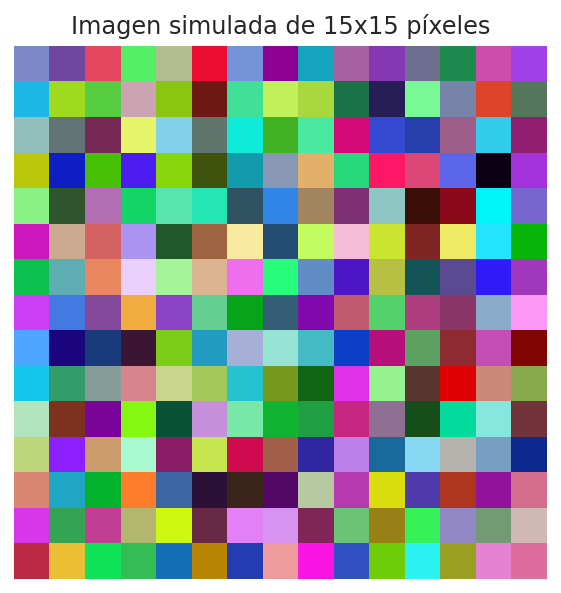

In [ ]:
# Tu código aquí ...

# Libería para visualizar la imagen
import matplotlib.pyplot as plt


A = np.random.randint(0, 256, (15, 15, 3), dtype=np.uint8)

# Graficar el tensor como imagen

plt.title("Imagen simulada de 15x15 píxeles")
plt.axis('off')  # Ocultar los ejes para mejor visualización
#plt.show()
plt.imshow(A);

<font color='green'>Fin actividad 2</font>

### <font color='green'>Actividad 3</font>

1. ¿Cuál de las matrices del ejercicio 1 se pueden multiplicar y en qué orden? ¿cuál es la forma de su producto?.
Seleccione 3 casos y realice la multiplicación.
1. Realice la suma de matrices del ejercicio 1.

In [ ]:
# Tu código aquí ...

# Multiplicación de matrices
a1 = np.array([[4,5,6], [8,-1,7]])
a2 = np.array([[3,-5],[-2,5],[8,8]])
a3 = np.array([[4,7,5]])
a4 = np.array([[4],[9],[2]])
a5 = np.array([[3,1], [7,8]])
a6 = np.array([[5,0],[3,2]])

matrices = [a1,a2,a3,a4,a5,a6]

for i in range(len(matrices)):
    print(f"Matriz A{i+1}:")
    print(f"Ejes: {matrices[i].ndim}")
    print(f"Tamaño: {matrices[i].size}")
    print(f"Forma: {matrices[i].shape}")
    print(matrices[i], "\n\n")


#Para poder multiplicar dos matrices, la condición es que el número de columnas de la primera matriz
#sea igual al número de filas de la segunda matriz.

for m in range(len(matrices)):
    for n in range(len(matrices)):
        if matrices[m].shape[1] == matrices[n].shape[0]:
            print(f"✅ La matriz A{m+1} ({matrices[m].shape[1]} columnas) SÍ se puede muliplicar con la matriz A{n+1} ({matrices[n].shape[0]} filas)")
            print("El resultado es:")
            print(matrices[m] @ matrices[n],"\n")
        # Sino, se muestra un mensaje acorde
        else:
            print(f"❌ La matriz A{m+1} ({matrices[m].shape[1]} columnas) NO se puede muliplicar con la matriz A{n+1} ({matrices[n].shape[0]} filas) porque no son compatibles.\n")

    else:
        print(f"Las matrices tienen dimensiones no compatibles. \n")



Matriz A1:
Ejes: 2
Tamaño: 6
Forma: (2, 3)
[[ 4  5  6]
 [ 8 -1  7]] 


Matriz A2:
Ejes: 2
Tamaño: 6
Forma: (3, 2)
[[ 3 -5]
 [-2  5]
 [ 8  8]] 


Matriz A3:
Ejes: 2
Tamaño: 3
Forma: (1, 3)
[[4 7 5]] 


Matriz A4:
Ejes: 2
Tamaño: 3
Forma: (3, 1)
[[4]
 [9]
 [2]] 


Matriz A5:
Ejes: 2
Tamaño: 4
Forma: (2, 2)
[[3 1]
 [7 8]] 


Matriz A6:
Ejes: 2
Tamaño: 4
Forma: (2, 2)
[[5 0]
 [3 2]] 


❌ La matriz A1 (3 columnas) NO se puede muliplicar con la matriz A1 (2 filas) porque no son compatibles.

✅ La matriz A1 (3 columnas) SÍ se puede muliplicar con la matriz A2 (3 filas)
El resultado es:
[[50 53]
 [82 11]] 

❌ La matriz A1 (3 columnas) NO se puede muliplicar con la matriz A3 (1 filas) porque no son compatibles.

✅ La matriz A1 (3 columnas) SÍ se puede muliplicar con la matriz A4 (3 filas)
El resultado es:
[[73]
 [37]] 

❌ La matriz A1 (3 columnas) NO se puede muliplicar con la matriz A5 (2 filas) porque no son compatibles.

❌ La matriz A1 (3 columnas) NO se puede muliplicar con la matriz A6 (2 

# <font color='purple'>**EXPERIMENTO**</font><br>




Como podemos ver, la restricción primaria para poder multiplicar matrices es la igualdad de cantidad de columnas de la primera matriz con la de filas de la segunda, pero... ¿Qué sucede con la cantidad de dimensiones?



In [ ]:
import math
import random

# Primero generaremos 10 grupos de matrices con números aletorios.

# Las matrices tendrán combinaciones de dimensiones desde 1 a 4, y luego se intentarán multiplicar entre sí.

lim_dim = 4  # Límite de dimensiones
dimensiones = list(range(1, lim_dim+1))
cant_grupos = 10
# para generar una cantidad de elementos compatible con todas las dimensiones,
# se genera un número a partir del factorial de límite de dimensiones
cantidad_elementos = math.factorial(lim_dim) #multiplicamos a su vez por lim_dim para obtener una muestra mayor.
elementos = np.arange(cantidad_elementos)
dict_matrices = dict()
# para cada cantidad de dimensiones
for i in range(lim_dim):
    dict_matrices[f"{i+1} dimensiones"] = [elementos]

    # para cada cantidad de elementos
    for j in range(cant_grupos):
        # para cada combinación de formas
        for k in range(len(dimensiones)):
            # se mezcla la lista de dimensiones
            random.shuffle(dimensiones)
            # se agrega al dict una matriz con un número aleatorio de dimensiones
            dict_matrices[f"{i+1} dimensiones"].append(elementos.reshape(dimensiones)[:k])

# Ahora, intentamos multiplicar todas con todas

# Para revisar qué tipos de errores se pueden generar, registraremos cada nuevo error
errores = []

for key_izq in dict_matrices.keys(): # key cantidad de dimensiones matriz de la izquierda
    for index_izq in range(cant_grupos): # index matriz de la izquierda
        for key_der in dict_matrices.keys(): # key cantidad de dimensiones matriz de la derecha
            for index_der in range(cant_grupos): # index matriz de la derecha
                try:
                    dict_matrices[key_izq][index_izq] @ dict_matrices[key_der][index_der]
                    #print(f"Se multiplicó una matriz de {key_izq} por una matriz de {key_der}")
                except Exception as e:
                    if e not in errores:
                        errores.append(e)


Ahora, analizaremos cuáles fueron las excepciones ocurridas

In [ ]:
errores


[ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 24)'),
 ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 24)'),
 ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 24)'),
 ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 24)'),
 ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 24)'),
 ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 24)'),
 ValueError('matmul: Input operand 1 has a mismatch in its core dimens

Podemos observar que los dos principales errores fueron:
### 1. ValueError('matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)'),
Este error ocurre cuando las dimensiones son diferentes

### 2. ValueError('operands could not be broadcast together with remapped shapes [original->remapped]: (1,2,4,3)->(1,2,newaxis,newaxis) (0,4,3,1)->(0,4,newaxis,newaxis)  and requested shape (4,1)'),
Este error también

## Conclusión
Al intentar realizar una multiplicación matricial de matrices de diferente dimension se obtiene error porque no es posible.

# <font color='purple'>**FIN EXPERIMENTO**</font><br>

In [ ]:
dimensiones = list(range(1, lim_dim+1))
random.shuffle(dimensiones)
print(dimensiones)


[2, 4, 1, 3]


In [ ]:
## Para sumar matrices, deben tener la misma forma. En este caso, solo A5 y A6 son de 2x2

for m in range(len(matrices)):
    for n in range(len(matrices)):
        # Primero evaluamos que las matrices tengan la misma forma
        if (matrices[m].shape == matrices[n].shape):
            # Si la forma de ambas es compatible, se procede a sumar
            if matrices[m].shape[1] == matrices[n].shape[0]:
                print(f"✅ La matriz A{m+1} (de forma {matrices[m].shape}) SÍ se puede sumar con la matriz A{n+1} (de forma {matrices[n].shape} filas)")
                print("El resultado es:")
                print(matrices[m] + matrices[n],"\n")
        # Son muchos más los casos en los que la forma no es compatible, por eso no se mostrarán en un else statement.


✅ La matriz A5 (de forma (2, 2)) SÍ se puede sumar con la matriz A5 (de forma (2, 2) filas)
El resultado es:
[[ 6  2]
 [14 16]] 

✅ La matriz A5 (de forma (2, 2)) SÍ se puede sumar con la matriz A6 (de forma (2, 2) filas)
El resultado es:
[[ 8  1]
 [10 10]] 

✅ La matriz A6 (de forma (2, 2)) SÍ se puede sumar con la matriz A5 (de forma (2, 2) filas)
El resultado es:
[[ 8  1]
 [10 10]] 

✅ La matriz A6 (de forma (2, 2)) SÍ se puede sumar con la matriz A6 (de forma (2, 2) filas)
El resultado es:
[[10  0]
 [ 6  4]] 



# ANEXO N°1: CRITERIOS DE EVALUACIÓN

## 1. Evaluación Económica (50%)

La evaluación del precio se realizará según la siguiente fórmula:

```
Puntaje Precio = (Precio mínimo ofertado / Precio oferta evaluada) × 50
```

Donde:
- El precio mínimo ofertado corresponde al menor valor entre todas las ofertas válidas
- El precio de la oferta evaluada corresponde al valor de la propuesta en evaluación

## 2. Características Técnicas (40%)

### 2.1 Capacidad y Autonomía (15%)

| Criterio | Puntaje |
|----------|---------|
| Autonomía igual o superior a 10 horas | 100 |
| Autonomía inferior a 10 horas | 0 |

### 2.2 Eficiencia de Conversión AC/DC-DC/AC (15%)

| Criterio | Puntaje |
|----------|---------|
| Eficiencia ≥ 95% | 100 |
| Eficiencia entre 93% y 94.9% | 70 |
| Eficiencia entre 90% y 92.9% | 40 |
| Eficiencia < 90% | 0 |

### 2.3 Compatibilidad y Características Adicionales (10%)

| Criterio | Puntaje |
|----------|---------|
| Compatible con SNMP + Software de monitoreo propio + Baterías de litio | 100 |
| Compatible con SNMP + Software de monitoreo propio | 70 |
| Solo compatible con SNMP | 40 |
| Sin compatibilidad SNMP | 0 |

## 3. Plazo de Entrega e Instalación (10%)

| Criterio | Puntaje |
|----------|---------|
| Entrega e instalación ≤ 10 días hábiles | 100 |
| Entrega e instalación entre 11 y 13 días hábiles | 70 |
| Entrega e instalación entre 14 y 15 días hábiles | 40 |
| Entrega e instalación > 15 días hábiles | 0 |

## 4. Puntaje Final

El puntaje final se calculará mediante la siguiente fórmula:

```
Puntaje Final = (Puntaje Precio × 0.5) + (Puntaje Características Técnicas × 0.4) + (Puntaje Plazo × 0.1)
```

## 5. Criterios de Desempate

En caso de empate en el puntaje final entre dos o más oferentes, se aplicarán los siguientes criterios de desempate en orden de precedencia:

1. Mayor puntaje en evaluación económica
2. Mayor puntaje en características técnicas
3. Mayor puntaje en plazo de entrega e instalación

## 6. Causales de Inadmisibilidad

Serán declaradas inadmisibles las ofertas que:

1. No cumplan con las especificaciones técnicas mínimas requeridas
2. No presenten la totalidad de los antecedentes solicitados
3. Excedan el plazo máximo de entrega e instalación de 15 días hábiles
4. Presenten inconsistencias en la información técnica o económica

Las ofertas que sean declaradas inadmisibles no serán evaluadas.

<font color='green'>Fin actividad 3</font>

### <font color='green'>Actividad 4</font>
1. Determine qué pares de vectores son ortogonales.<br>
2. Para aquellos que no lo son, calcule su ángulo.

In [ ]:
# Vectores
v1 = np.array([2, 1, -1])
v2 = np.array([0, 1, 1])
v3 = np.array([1, -1, 2])

# Tu código aquí ...

def verificar_ortogonalidad(v, w):
    producto_punto = np.dot(v, w)
    if producto_punto == 0:
        print(f"Los vectores {v} y {w} son ortogonales.")
    else:
        # Calcular el ángulo
        norma_v = np.linalg.norm(v)
        norma_w = np.linalg.norm(w)
        cos_theta = producto_punto / (norma_v * norma_w)
        angulo_radianes = np.arccos(cos_theta)
        angulo_grados = np.degrees(angulo_radianes)
        print(f"Los vectores {v} y {w} no son ortogonales.")
        print(f"Ángulo en radianes: {angulo_radianes}")
        print(f"Ángulo en grados: {angulo_grados}\n")

# Verificar todos los pares de vectores
verificar_ortogonalidad(v1, v2)
verificar_ortogonalidad(v1, v3)
verificar_ortogonalidad(v2, v3)

## Producto punto: Si el resultado es cero, los vectores son ortogonales.
## Ángulo: Si los vectores no son ortogonales, se calcula el ángulo entre ellos en radianes y grados.

Los vectores [ 2  1 -1] y [0 1 1] son ortogonales.
Los vectores [ 2  1 -1] y [ 1 -1  2] no son ortogonales.
Ángulo en radianes: 1.738244406014586
Ángulo en grados: 99.59406822686047

Los vectores [0 1 1] y [ 1 -1  2] no son ortogonales.
Ángulo en radianes: 1.277953555066321
Ángulo en grados: 73.22134511903964



<font color='green'>Fin actividad 4</font>

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="100" align="left" title="Runa-perth">
<br clear="left">

## <font color='blue'>**Función para graficar planos**</font>

A continuación dejamos una segunda función para dibujar un plano cartesiano. La misma implementa muchos más detalles que la primera. Analícela y deconstrúyala hasta entenderla perfectamente.

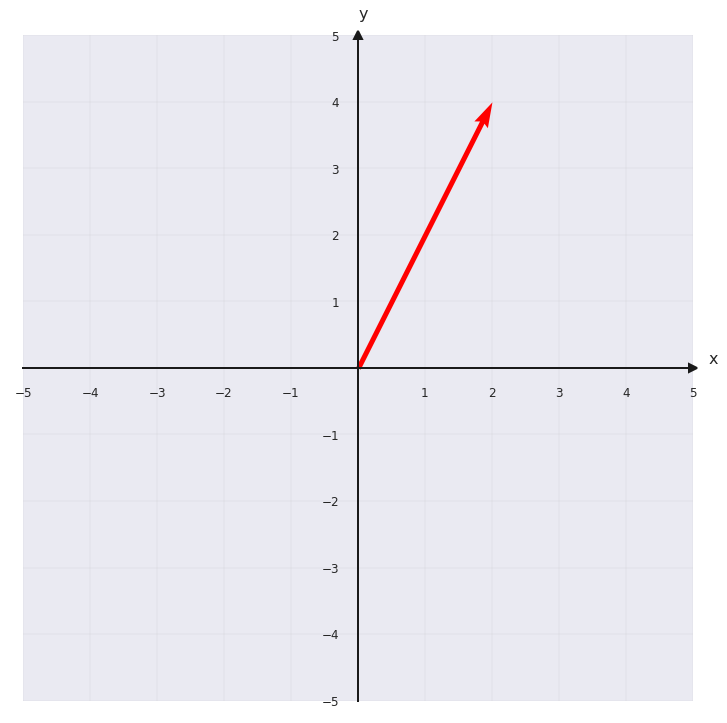

In [ ]:
def e_cartesiano(n):
  """
  Crea un espacio cartesiano bidimensional de dimension n x n
  """
  fig, ax = plt.subplots(figsize=(6, 6))
  min = -1 * n
  max = n

  # Pocisionamos los ejes (axis) en el centro (0,0) y no en los bordes
  # como vienen por defecto
  for s in ['left', 'bottom']:
    ax.spines[s].set_position('zero')
    ax.spines[s].set_color('k')
    ax.spines[s].set_linewidth(1)
  for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
  # Añadimos una etiqueta a cada eje
  ax.set_xlabel('x', size=8, labelpad=-24, x=1.03)
  ax.set_ylabel('y', size=8, labelpad=-21, y=1.02, rotation=0)
  ax.set_alpha(0.5)
  # Creamos los ticks
  x_ticks = np.arange(min, max+1, 1) # Desde, hasta, frecuencia
  y_ticks = np.arange(min, max+1, 1)
  ax.set_xticks(x_ticks[x_ticks != 0])
  ax.set_yticks(y_ticks[y_ticks != 0])
  plt.xticks(fontsize=6)
  plt.yticks(fontsize=6)
  ax.set_xlim(min, max)
  ax.set_ylim(min, max)
  # Dibujamos la grilla
  ax.grid(which='both', color='grey', linewidth=0.2,
          linestyle='-', alpha=0.2)
  # Y los ejes en color negro
  arrow_fmt = dict(markersize=4, color='k', clip_on=False, zorder=5)
  ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
  ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
  return ax


e_cartesiano(5)
graficarVector([2,4], color='red')

<img src="https://drive.google.com/uc?export=view&id=1DNuGbS1i-9it4Nyr3ZMncQz9cRhs2eJr" width="50" align="left" title="Runa-perth">
<br clear="left">